In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os
import math
import operator
import random as rd

In [166]:
iris = pd.read_csv("../input/Iris.csv")
iris.drop('Id',axis=1,inplace=True)

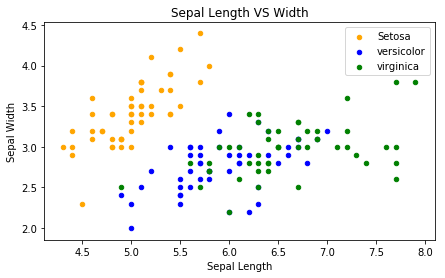

In [143]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(7,4)
plt.show()

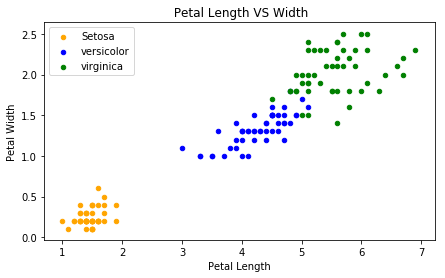

In [142]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(7,4)
plt.show()

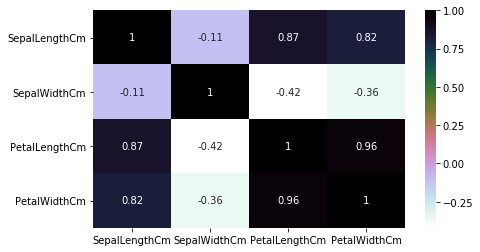

In [30]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [31]:
x = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=iris.Species
x_train, x_test,y_train, y_test = train_test_split(x,y,0.30)

In [32]:
#self implemented functions here
def train_test_split(x,y,test_size):
    i = int(len(x)*(1-test_size))
    return x[0:i],x[i:],y[0:i],y[i:]


In [69]:
def ED(x1, x2, length):
    distance = 0
    for x in range(length):
        distance += np.square(x1[x] - x2[x])
    return np.sqrt(distance)

def knn_algo(x,test,k):
    length = len(test)-1
    distances={}
    #sort={}
    for i in range(len(x)):
        dist = ED(x.iloc[i],test,length)
        #print(dist)
        distances[i]=dist
    sortdist = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    for i in range(k):
        neighbors.append(sortdist[i][0])
    Votes={}
    for i in range(len(neighbors)):
        response = x.iloc[neighbors[i]][-1] #taking response will handle even for multiclass
        if response in Votes:
            Votes[response] += 1
        else:
            Votes[response] = 1
    sortvotes = sorted(Votes.items(), key=operator.itemgetter(1), reverse=True)
    return sortvotes[0][0]

def pred_knn(x_train,x_test,k):
    output = []
    for i in range(len(x_test)):
        output.append(knn_algo(x_train,x_test.iloc[i],k))
    return output

for k=1 Correct=25 Wrong=5 Accuracy=0.8333333333333334
for k=2 Correct=25 Wrong=5 Accuracy=0.8333333333333334
for k=3 Correct=23 Wrong=7 Accuracy=0.7666666666666667
for k=4 Correct=25 Wrong=5 Accuracy=0.8333333333333334
for k=5 Correct=24 Wrong=6 Accuracy=0.8
for k=6 Correct=25 Wrong=5 Accuracy=0.8333333333333334
for k=7 Correct=24 Wrong=6 Accuracy=0.8
for k=8 Correct=24 Wrong=6 Accuracy=0.8
for k=9 Correct=23 Wrong=7 Accuracy=0.7666666666666667
for k=10 Correct=24 Wrong=6 Accuracy=0.8
for k=11 Correct=23 Wrong=7 Accuracy=0.7666666666666667
for k=12 Correct=24 Wrong=6 Accuracy=0.8
for k=13 Correct=23 Wrong=7 Accuracy=0.7666666666666667
for k=14 Correct=23 Wrong=7 Accuracy=0.7666666666666667


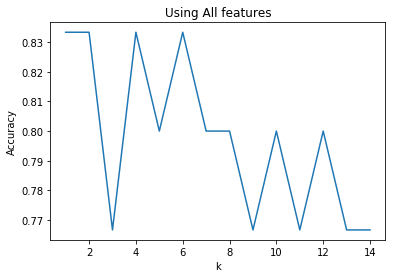

In [84]:
#KNN using all features
yknn  = []
xknn= []
for k in range(1,15):
    split = int(len(iris)*0.8)
    predictions = pred_knn(iris[0:split],iris[split:],k)
    ta=0
    fa=0
    for i in range(len(predictions)):
        if(predictions[i]==iris[split:]['Species'].iloc[i]):
            ta+=1
        else:
            fa+=1
    accu = ta/(ta+fa)
    print("for k="+str(k)+" Correct="+str(ta)+" Wrong="+str(fa)+" Accuracy="+str(accu))
    yknn.append(accu)
    xknn.append(k)
plt.title("Using All features")
plt.plot(xknn,yknn)
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.show()


for k=1 Correct=8 Wrong=22 Accuracy=0.26666666666666666
for k=2 Correct=8 Wrong=22 Accuracy=0.26666666666666666
for k=3 Correct=9 Wrong=21 Accuracy=0.3
for k=4 Correct=9 Wrong=21 Accuracy=0.3
for k=5 Correct=8 Wrong=22 Accuracy=0.26666666666666666
for k=6 Correct=7 Wrong=23 Accuracy=0.23333333333333334
for k=7 Correct=9 Wrong=21 Accuracy=0.3
for k=8 Correct=6 Wrong=24 Accuracy=0.2
for k=9 Correct=6 Wrong=24 Accuracy=0.2
for k=10 Correct=5 Wrong=25 Accuracy=0.16666666666666666
for k=11 Correct=5 Wrong=25 Accuracy=0.16666666666666666
for k=12 Correct=4 Wrong=26 Accuracy=0.13333333333333333
for k=13 Correct=3 Wrong=27 Accuracy=0.1
for k=14 Correct=4 Wrong=26 Accuracy=0.13333333333333333


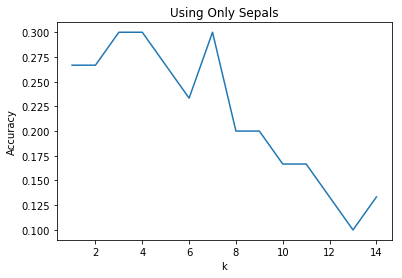

In [82]:
#KNN using only sepals
yknn  = []
xknn= []
df = iris.drop(['PetalLengthCm', 'PetalWidthCm'], axis=1)
for k in range(1,15):
    split = int(len(df)*0.8)
    predictions = pred_knn(df[0:split],df[split:],k)
    ta=0
    fa=0
    for i in range(len(predictions)):
        if(predictions[i]==df[split:]['Species'].iloc[i]):
            ta+=1
        else:
            fa+=1
    accu = ta/(ta+fa)
    print("for k="+str(k)+" Correct="+str(ta)+" Wrong="+str(fa)+" Accuracy="+str(accu))
    yknn.append(accu)
    xknn.append(k)
plt.title("Using Only Sepals")
plt.plot(xknn,yknn)
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.show()


for k=1 Correct=26 Wrong=4 Accuracy=0.8666666666666667
for k=2 Correct=26 Wrong=4 Accuracy=0.8666666666666667
for k=3 Correct=24 Wrong=6 Accuracy=0.8
for k=4 Correct=25 Wrong=5 Accuracy=0.8333333333333334
for k=5 Correct=25 Wrong=5 Accuracy=0.8333333333333334
for k=6 Correct=25 Wrong=5 Accuracy=0.8333333333333334
for k=7 Correct=25 Wrong=5 Accuracy=0.8333333333333334
for k=8 Correct=25 Wrong=5 Accuracy=0.8333333333333334
for k=9 Correct=25 Wrong=5 Accuracy=0.8333333333333334
for k=10 Correct=25 Wrong=5 Accuracy=0.8333333333333334
for k=11 Correct=24 Wrong=6 Accuracy=0.8
for k=12 Correct=24 Wrong=6 Accuracy=0.8
for k=13 Correct=23 Wrong=7 Accuracy=0.7666666666666667
for k=14 Correct=24 Wrong=6 Accuracy=0.8


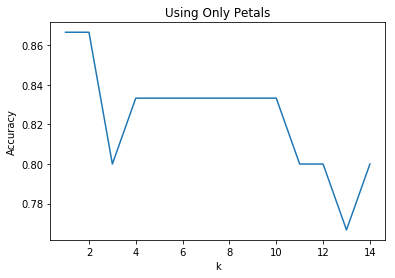

In [83]:
#KNN using only petals
yknn  = []
xknn= []
df = iris.drop(['SepalLengthCm', 'SepalWidthCm'], axis=1)
for k in range(1,15):
    split = int(len(df)*0.8)
    predictions = pred_knn(df[0:split],df[split:],k)
    ta=0
    fa=0
    for i in range(len(predictions)):
        if(predictions[i]==df[split:]['Species'].iloc[i]):
            ta+=1
        else:
            fa+=1
    accu = ta/(ta+fa)
    print("for k="+str(k)+" Correct="+str(ta)+" Wrong="+str(fa)+" Accuracy="+str(accu))
    yknn.append(accu)
    xknn.append(k)
plt.title("Using Only Petals")
plt.plot(xknn,yknn)
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.show()

In [85]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [151]:
#K-means for only petal length and width
df = iris.drop(['SepalLengthCm', 'SepalWidthCm','Species'], axis=1)
#split = int(len(df)*0.8)
#x = iris.values
#x[-1] = [-1 ]
x = df.values
#x_test = df[split:].values
n=x.shape[0]#no of examples
m=x.shape[1]#no of features
num_iter= 100
k=3
centroids=np.array([]).reshape(m,0)
for i in range(k):
    rand=rd.randint(0,n-1)
    centroids=np.c_[centroids,x[rand]]
output={}
dist=np.array([]).reshape(n,0)
for i in range(k):
    tempDist=np.sum((x-centroids[:,i])**2,axis=1)#nx1
    #print((x-centroids[:,i])**2)
    dist=np.c_[dist,tempDist]#nxk
C=np.argmin(dist,axis=1)+1 #nx1 cluster-datapoint map 
Y={}
for i in range(k):
    Y[i+1]=np.array([]).reshape(2,0)
for i in range(n):
    Y[C[i]]=np.c_[Y[C[i]],x[i]] #correct cluster
     
for i in range(k):
    Y[i+1]=Y[i+1].T
    
for i in range(k):
    centroids[:,i]=np.mean(Y[i+1],axis=0)
        
for i in range(num_iter):
    dist=np.array([]).reshape(n,0)
    for j in range(k):
        tempDist=np.sum((x-centroids[:,j])**2,axis=1)
        dist=np.c_[dist,tempDist]
    C=np.argmin(dist,axis=1)+1
    Y={}
    for j in range(k):
        Y[j+1]=np.array([]).reshape(2,0)
    for j in range(n):
        Y[C[j]]=np.c_[Y[C[j]],x[j]]
    for j in range(k):
        Y[j+1]=Y[j+1].T
    for j in range(k):
        centroids[:,j]=np.mean(Y[j+1],axis=0)
    Output=Y

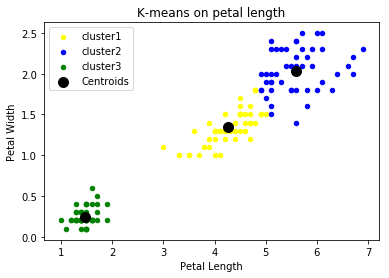

In [152]:
color=['yellow','blue','green']
labels=['cluster1','cluster2','cluster3']
for i in range(k):
    plt.scatter(Output[i+1][:,0],Output[i+1][:,1],c=color[i],label=labels[i],s=20)
plt.scatter(centroids[0,:],centroids[1,:],s=100,c='black',label='Centroids')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("K-means on petal length")
plt.legend()
plt.show()

In [153]:
#K-means for only sepal length and width
df = iris.drop(['PetalLengthCm', 'PetalWidthCm','Species'], axis=1)
#split = int(len(df)*0.8)
#x = iris.values
#x[-1] = [-1 ]
x = df.values
#x_test = df[split:].values
n=x.shape[0]#no of examples
m=x.shape[1]#no of features
num_iter= 100
k=3
centroids=np.array([]).reshape(m,0)
for i in range(k):
    rand=rd.randint(0,n-1)
    centroids=np.c_[centroids,x[rand]]
output={}
dist=np.array([]).reshape(n,0)
for i in range(k):
    tempDist=np.sum((x-centroids[:,i])**2,axis=1)#nx1
    #print((x-centroids[:,i])**2)
    dist=np.c_[dist,tempDist]#nxk
C=np.argmin(dist,axis=1)+1 #nx1 cluster-datapoint map 
Y={}
for i in range(k):
    Y[i+1]=np.array([]).reshape(2,0)
for i in range(n):
    Y[C[i]]=np.c_[Y[C[i]],x[i]] #correct cluster
     
for i in range(k):
    Y[i+1]=Y[i+1].T
    
for i in range(k):
    centroids[:,i]=np.mean(Y[i+1],axis=0)
        
for i in range(num_iter):
    dist=np.array([]).reshape(n,0)
    for j in range(k):
        tempDist=np.sum((x-centroids[:,j])**2,axis=1)
        dist=np.c_[dist,tempDist]
    C=np.argmin(dist,axis=1)+1
    Y={}
    for j in range(k):
        Y[j+1]=np.array([]).reshape(2,0)
    for j in range(n):
        Y[C[j]]=np.c_[Y[C[j]],x[j]]
    for j in range(k):
        Y[j+1]=Y[j+1].T
    for j in range(k):
        centroids[:,j]=np.mean(Y[j+1],axis=0)
    Output=Y

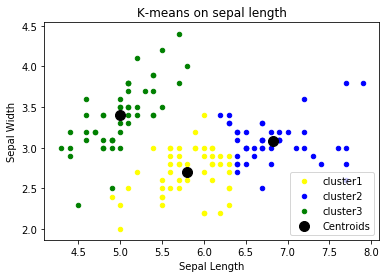

In [156]:
color=['yellow','blue','green']
labels=['cluster1','cluster2','cluster3']
for i in range(k):
    plt.scatter(Output[i+1][:,0],Output[i+1][:,1],c=color[i],label=labels[i],s=20)
plt.scatter(centroids[0,:],centroids[1,:],s=100,c='black',label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("K-means on sepal length")
plt.legend()
plt.show()